In [9]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
import glob
import json
import os
import sys
import json
import os
import sys
import multiprocessing
import shutil
pool = multiprocessing.Pool(multiprocessing.cpu_count())

def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")
    ax.get_figure().savefig(os.path.splitext(pdfname)[0] + ".png", bbox_inches="tight")

! mkdir -p figures


In [10]:
import sqlite3

con = sqlite3.connect("ratings.db")
df = pd.read_sql_query("""
select * from (
    select user_ID, max(timestamp), min(timestamp), count(rating) as c
        from (select * from ratings where rating <> -1) group by user_ID
) where c > 100
""", con)

df["max(timestamp)"] = pd.to_datetime(df["max(timestamp)"], format="%Y-%m-%d %H:%M:%S %f")
df["min(timestamp)"] = pd.to_datetime(df["min(timestamp)"], format="%Y-%m-%d %H:%M:%S %f")
df["dur"] = (df["max(timestamp)"] - df["min(timestamp)"]).dt.total_seconds() / 60
print(df["dur"].max(), df["dur"].mean(), df["dur"].std())
df = df[df["dur"] <= df["dur"].mean() + df["dur"].std()]  # remove some outliers
d(df.head())

674.5970826500001 24.616604946 62.042322134699546


,user_ID,max(timestamp),min(timestamp),c,dur
0,1,2020-03-27 14:00:39.359105,2020-03-27 13:51:10.959845,150,9.473321
1,4,2020-03-27 15:47:27.182790,2020-03-27 15:26:39.085936,150,20.801614
2,5,2020-03-27 16:13:12.840370,2020-03-27 16:06:54.600684,150,6.303995
3,7,2020-03-27 16:22:19.186087,2020-03-27 16:07:59.193637,150,14.333208
4,62,2020-03-30 15:07:52.655561,2020-03-30 14:53:35.104523,150,14.292517


15.148404433333333


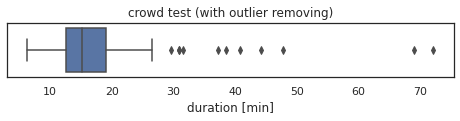

In [13]:
sns.set(rc={'figure.figsize':(8,1)})
sns.set_style("white")
ax = sns.boxplot(x=df["dur"])
#print(df["dur"].median())
ax.set_xlabel("duration [min]")
save_fig(ax, "crowd test (with outlier removing)", "figures/crowd_test_duration_bb.pdf")


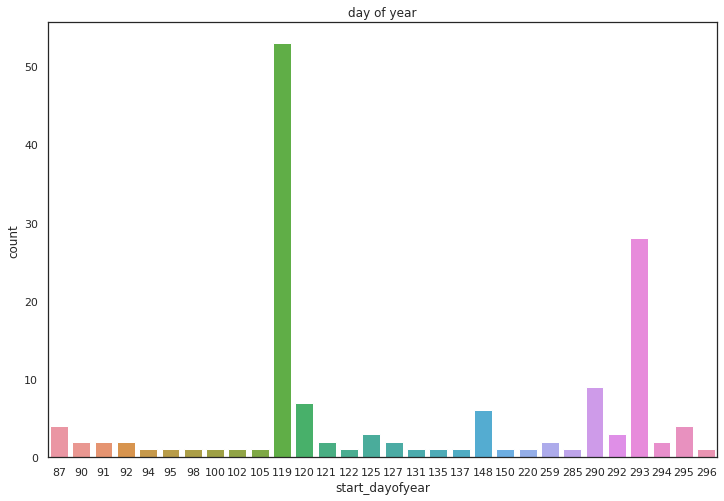

In [9]:
# when did people start the test

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")

df["start_dayofyear"] = df["min(timestamp)"].dt.dayofyear

ax = sns.countplot(x="start_dayofyear", data=df)

save_fig(ax, "day of year", "figures/day_of_year_count.pdf")

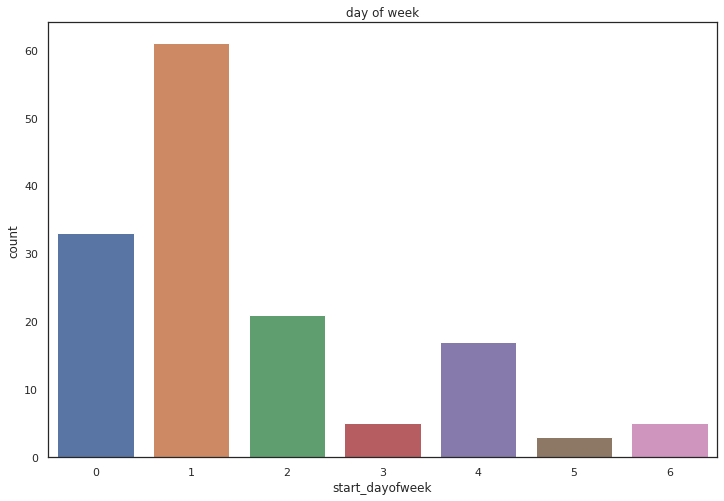

In [10]:
df["start_dayofweek"] = df["min(timestamp)"].dt.dayofweek

ax = sns.countplot(x="start_dayofweek", data=df)
save_fig(ax, "day of week", "figures/day_of_week_count.pdf")

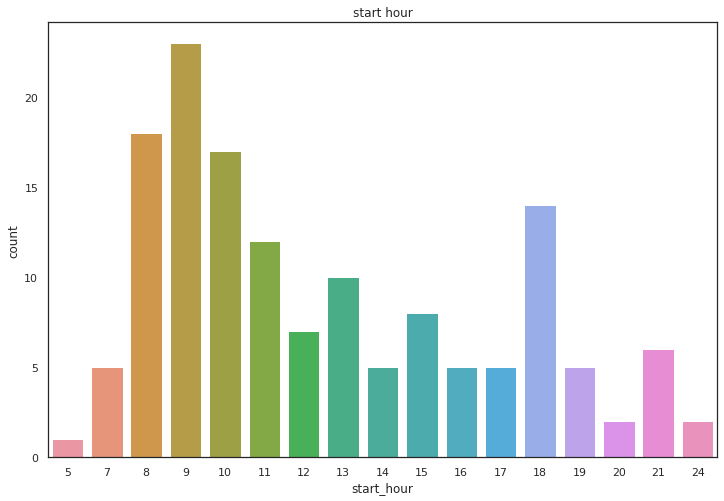

In [14]:
df["start_hour"] = df["min(timestamp)"].dt.hour + 2  # because of UTC

ax = sns.countplot(x="start_hour", data=df)
save_fig(ax, "start hour", "figures/start_hour_count.pdf")